<a href="https://www.kaggle.com/code/joopaulopedrosomaus/randomfore-ransomware-detection-and-classification?scriptVersionId=163224018" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing Libraries

In [17]:
# Import the datasets

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

warnings.filterwarnings(action="ignore")

### Preprocessing

In [20]:
# open the datasets :
df = pd.read_csv("./input/ransomware-detection-data-set/data_file.csv")
# delete the useless columns :
cols_to_drop = ['FileName','md5Hash']
df = df.drop(columns=cols_to_drop)
# replace the value repeated : MD5HASH - DebugSize - MajorOSVersion - BitcoinAddresses - NumberOfSections - SizeOfStackReserve
columns = ["Machine", "DebugSize", "NumberOfSections", "SizeOfStackReserve","MajorOSVersion", "BitcoinAddresses"]
for col in columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
# delete all the duplicated rows :
df.drop_duplicates(keep='last')
# save the new datasets into new csv file :
df.to_csv("df_clear.csv")

### Prepare our dataset after preprocessing

In [21]:
df = pd.read_csv("df_clear.csv")
df.head()

,Unnamed: 0,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0,1,0,0,0,4,0,0,8192,8,0,2,12,34112,672,0,1
1,1,4,11,121728,10,10,126576,4930,0,14,10,7,9,16864,1024,0,1
2,2,1,0,0,0,4,0,0,8192,8,0,2,12,34112,672,0,1
3,3,4,11,19904,10,10,21312,252,18160,14,10,5,9,16736,1040,0,1
4,4,4,11,97728,10,10,105792,1852,70592,14,10,6,9,16736,1096,0,1


In [22]:
# dataframe informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          62485 non-null  int64
 1   Machine             62485 non-null  int64
 2   DebugSize           62485 non-null  int64
 3   DebugRVA            62485 non-null  int64
 4   MajorImageVersion   62485 non-null  int64
 5   MajorOSVersion      62485 non-null  int64
 6   ExportRVA           62485 non-null  int64
 7   ExportSize          62485 non-null  int64
 8   IatVRA              62485 non-null  int64
 9   MajorLinkerVersion  62485 non-null  int64
 10  MinorLinkerVersion  62485 non-null  int64
 11  NumberOfSections    62485 non-null  int64
 12  SizeOfStackReserve  62485 non-null  int64
 13  DllCharacteristics  62485 non-null  int64
 14  ResourceSize        62485 non-null  int64
 15  BitcoinAddresses    62485 non-null  int64
 16  Benign              62485 non-null  int6

In [23]:
# Transoform into List :
X = df.iloc[:, 1:-1].values
Y = df.iloc[:,-1].values

In [24]:
print("The features (Machine ... Bitcoin@) : ")
X

The features (Machine ... Bitcoin@) : 


array([[     1,      0,      0, ...,  34112,    672,      0],
       [     4,     11, 121728, ...,  16864,   1024,      0],
       [     1,      0,      0, ...,  34112,    672,      0],
       ...,
       [     1,      0,      0, ...,      0,   2364,      0],
       [     1,      0,      0, ...,      0, 130296,      0],
       [     1,      0,      0, ...,      0,   6912,      0]])

In [25]:
print("Target vecteur (Benign) : ")
Y

Target vecteur (Benign) : 


array([1, 1, 1, ..., 0, 0, 0])

In [27]:
# Generate random classification data
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2,random_state=0)

# Split data into training and testing sets
# 20% testing and 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# random state if we split for plusieur fois, ca ne sera pas changer :
# 80% of 1 and 20% if re-split maysrach lakhlate

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100,random_state=0)

# Fit the Random Forest Classifier to the training data
rf.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = rf.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", rf.score(X_test, y_test))

Accuracy: 0.97


### Add a new to test and see the results

In [28]:
# Load new data for prediction
X_new = [[1, 1, 0, 0, 6, 2, 0, 8192, 8, 0, 3, 1048576, 34112, 672,0],[3, 0,	0, 0, 6, 2,	0, 8192, 8,	0, 0, 0, 0, 672,0 ]]

# Use the model to predict the classes of the new data
y_pred = rf.predict(X_new)

# Print the predicted classes of the new data
print("Predicted classes:", y_pred)

Predicted classes: [1 1]


### Evaluate its performance using different metrics

Confusion Matrix:
[[95  3]
 [ 3 99]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97       102

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



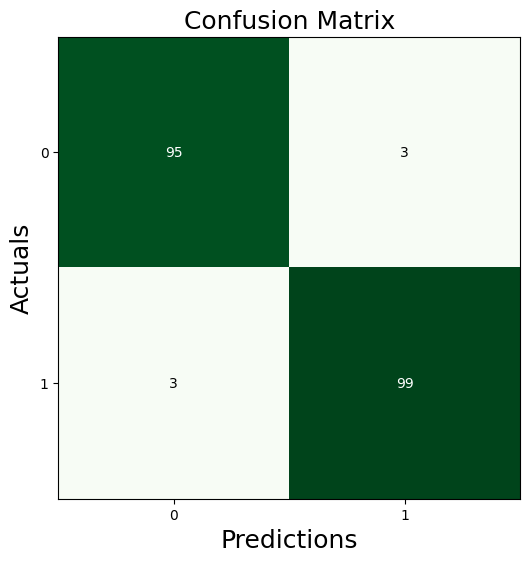

'\nIn the confusion matrix:\n    - True Positive (TP): The model correctly predicted the positive class.\n    - True Negative (TN): The model correctly predicted the negative class.\n    - False Positive (FP): The model predicted the positive class, but it was actually negative (also known as a Type I error).\n    - False Negative (FN): The model predicted the negative class, but it was actually positive (also known as a Type II error).\n\n\n\n            Actual   Positive       Actual Negative\nPredicted Positive       TP               FP\nPredicted Negative       FN               TN\n'

In [29]:
# Use the model to predict the classes of the testing set
y_pred = rf.predict(X_test)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

fig, ax = plot_confusion_matrix(conf_mat=cm , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

"""
In the confusion matrix:
    - True Positive (TP): The model correctly predicted the positive class.
    - True Negative (TN): The model correctly predicted the negative class.
    - False Positive (FP): The model predicted the positive class, but it was actually negative (also known as a Type I error).
    - False Negative (FN): The model predicted the negative class, but it was actually positive (also known as a Type II error).



            Actual   Positive       Actual Negative
Predicted Positive       TP               FP
Predicted Negative       FN               TN
"""

### Cross-validation to estimate its performance on new data

In [30]:
# Calculate cross-validation scores for the model
# cross-validation scores for a model : a way of evaluating the performance of the model on a given dataset.
scores = cross_val_score(rf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Mean score refers to the average score obtained from a set of scores. (moyenne)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.99  0.96  0.935 0.95  0.96 ]
Mean Score: 0.959


### Show the features

<function matplotlib.pyplot.show(close=None, block=None)>

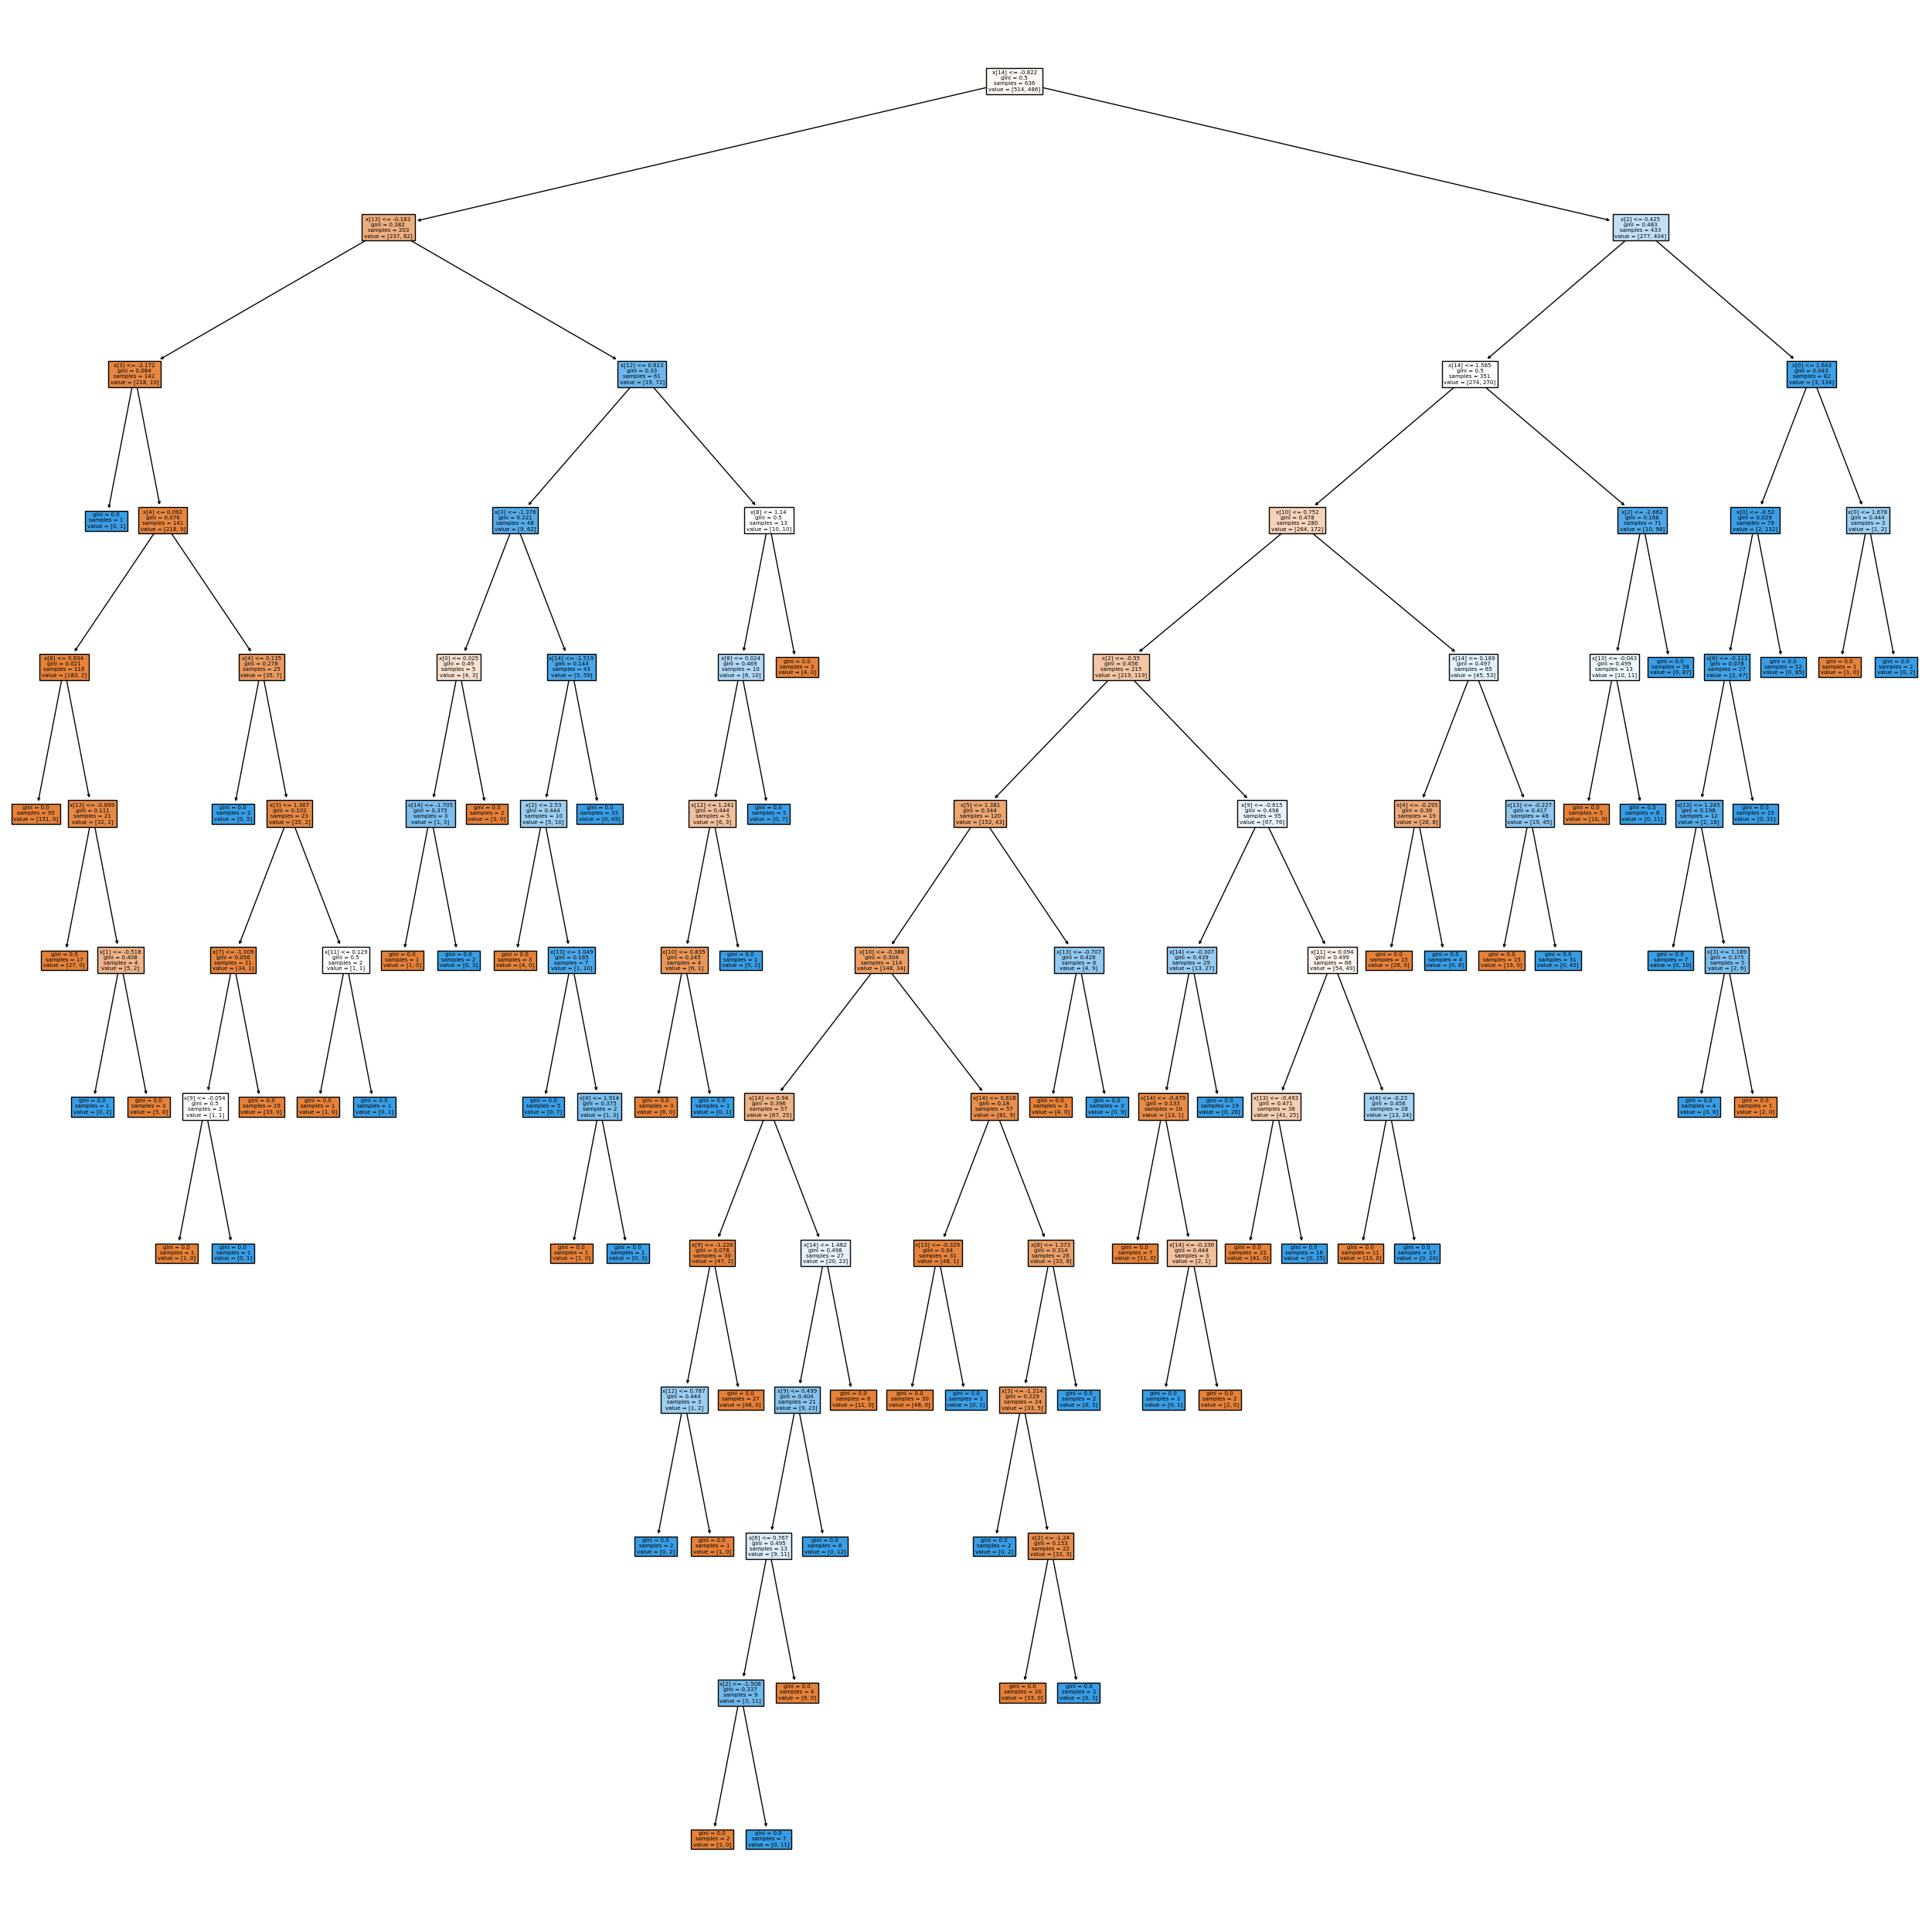

In [ ]:
# Fit the classifier to the data
rf.fit(X, y)

# Plot the first tree in the forest
plt.figure(figsize=(32, 32))
plot_tree(rf.estimators_[0], filled=True)
plt.show